In [1]:
import time
from datetime import datetime
import vectorbt as vbt
from tqdm import tqdm

import pandas as pd
import pandas_ta as ta
import numpy as np
import mplfinance as mpf

from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('EURUSD_1h.csv')
data.head()

timestamp      open      high       low     close  \
0  2021-11-04 17:00:00+00:00  1.154734  1.155535  1.154734  1.155001   
1  2021-11-04 18:00:00+00:00  1.155135  1.156069  1.155135  1.155668   
2  2021-11-04 19:00:00+00:00  1.155535  1.156203  1.155535  1.156069   
3  2021-11-04 20:00:00+00:00  1.156069  1.156069  1.155535  1.155936   
4  2021-11-04 21:00:00+00:00  1.155802  1.156470  1.155268  1.155802   

   adj close  volumn  
0   1.155001       0  
1   1.155668       0  
2   1.156069       0  
3   1.155936       0  
4   1.155802       0

In [3]:
df = data.copy()
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True).dt.tz_localize(None)
df.set_index('timestamp', inplace = True)
df

open      high       low     close  adj close  volumn
timestamp                                                                     
2021-11-04 17:00:00  1.154734  1.155535  1.154734  1.155001   1.155001       0
2021-11-04 18:00:00  1.155135  1.156069  1.155135  1.155668   1.155668       0
2021-11-04 19:00:00  1.155535  1.156203  1.155535  1.156069   1.156069       0
2021-11-04 20:00:00  1.156069  1.156069  1.155535  1.155936   1.155936       0
2021-11-04 21:00:00  1.155802  1.156470  1.155268  1.155802   1.155802       0
...                       ...       ...       ...       ...        ...     ...
2022-08-30 12:00:00  1.002908  1.003714  1.001202  1.001603   1.001603       0
2022-08-30 13:00:00  1.001703  1.004117  1.001603  1.003009   1.003009       0
2022-08-30 14:00:00  1.002104  1.002104  0.998702  0.998901   0.998901       0
2022-08-30 15:00:00  0.999400  1.003512  0.999400  1.002104   1.002104       0
2022-08-30 16:00:00  1.002305  1.003512  1.002004  1.002707   1.002707       0

[5010 rows x 6 columns]

In [4]:
df.ta.willr(length=14, append=True)
df

open      high       low     close  adj close  \
timestamp                                                                
2021-11-04 17:00:00  1.154734  1.155535  1.154734  1.155001   1.155001   
2021-11-04 18:00:00  1.155135  1.156069  1.155135  1.155668   1.155668   
2021-11-04 19:00:00  1.155535  1.156203  1.155535  1.156069   1.156069   
2021-11-04 20:00:00  1.156069  1.156069  1.155535  1.155936   1.155936   
2021-11-04 21:00:00  1.155802  1.156470  1.155268  1.155802   1.155802   
...                       ...       ...       ...       ...        ...   
2022-08-30 12:00:00  1.002908  1.003714  1.001202  1.001603   1.001603   
2022-08-30 13:00:00  1.001703  1.004117  1.001603  1.003009   1.003009   
2022-08-30 14:00:00  1.002104  1.002104  0.998702  0.998901   0.998901   
2022-08-30 15:00:00  0.999400  1.003512  0.999400  1.002104   1.002104   
2022-08-30 16:00:00  1.002305  1.003512  1.002004  1.002707   1.002707   

                     volumn   WILLR_14  
timestamp                               
2021-11-04 17:00:00       0        NaN  
2021-11-04 18:00:00       0        NaN  
2021-11-04 19:00:00       0        NaN  
2021-11-04 20:00:00       0        NaN  
2021-11-04 21:00:00       0        NaN  
...                     ...        ...  
2022-08-30 12:00:00       0 -55.241963  
2022-08-30 13:00:00       0 -34.938391  
2022-08-30 14:00:00       0 -94.240036  
2022-08-30 15:00:00       0 -47.998554  
2022-08-30 16:00:00       0 -40.460707  

[5010 rows x 7 columns]

In [5]:
def willr_plot(df, start, end, willr_length):
    df_plot = df.iloc[start: end]
    willr = df_plot['WILLR_'+str(willr_length)]

    overbought_line = np.empty(df_plot.shape[0])
    overbought_line.fill(-20)
    oversold_line = np.empty(df_plot.shape[0])
    oversold_line.fill(-80)

    willr_plot = mpf.make_addplot(willr, panel=1, color='blue', width=1, ylabel='willr')
    overbought_plot = mpf.make_addplot(overbought_line, panel=1, color='orange', width=0.8, secondary_y=False)
    oversold_plot = mpf.make_addplot(oversold_line, panel=1, color='orange', width=0.8, secondary_y=False)
    result_plots = [willr_plot, oversold_plot, overbought_plot]

    return result_plots

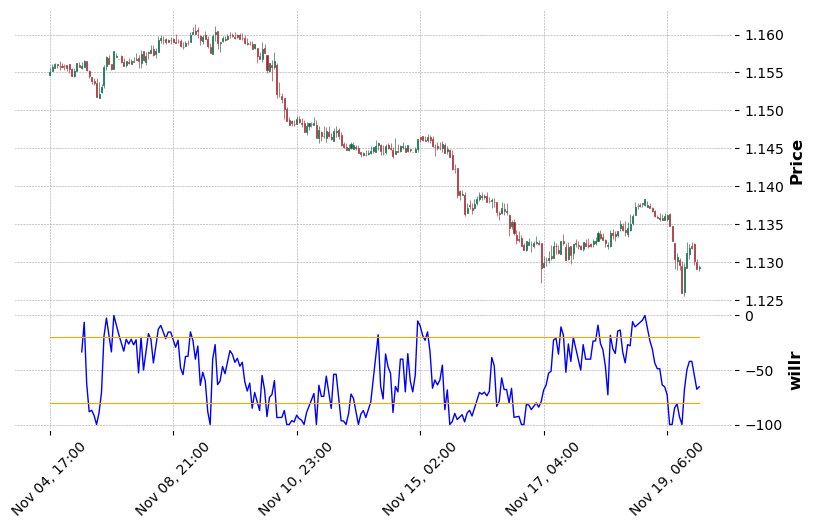

In [6]:
willr_info_plots = willr_plot(df, 0, 264, 14)

mpf.plot(df.iloc[0:264], type='candle', style='charles',
         addplot=willr_info_plots,
         figsize=(10, 6))

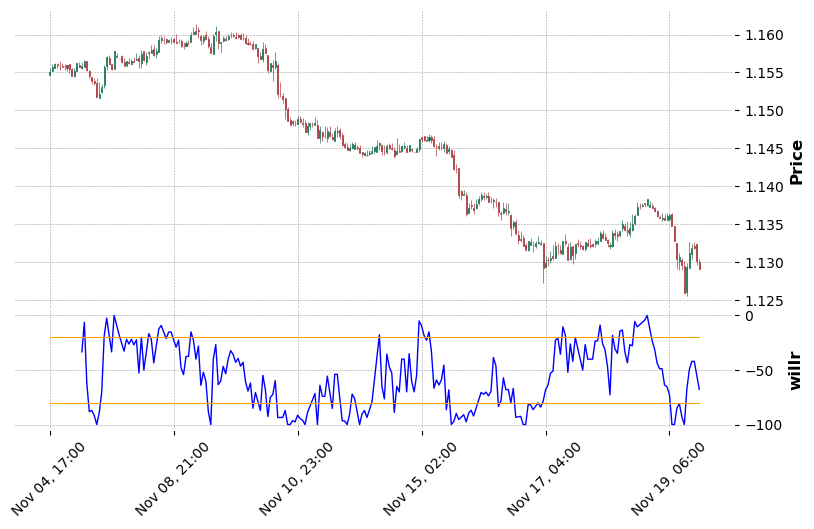

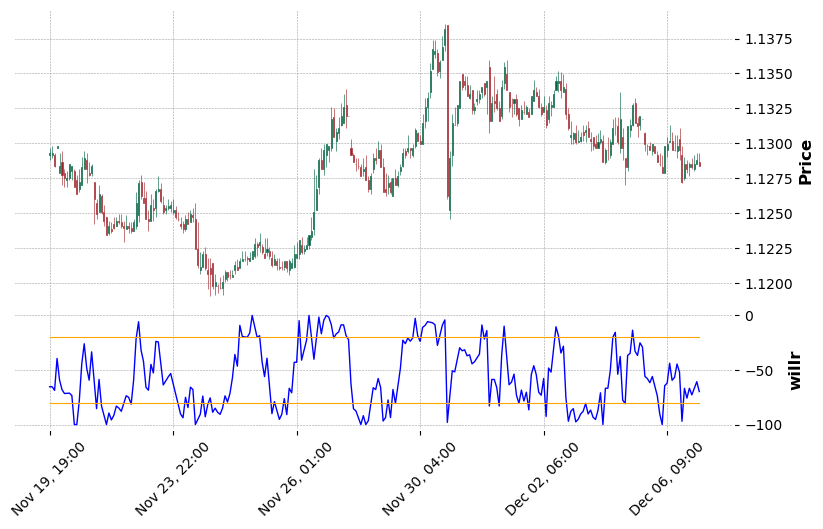

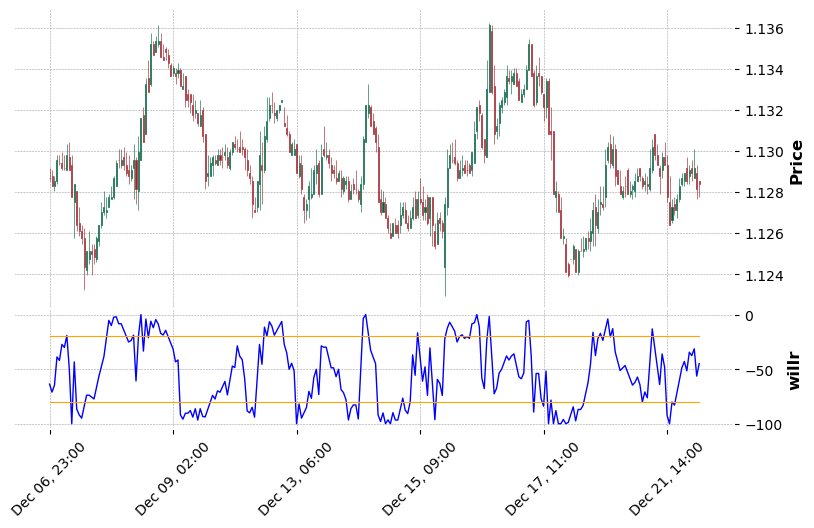

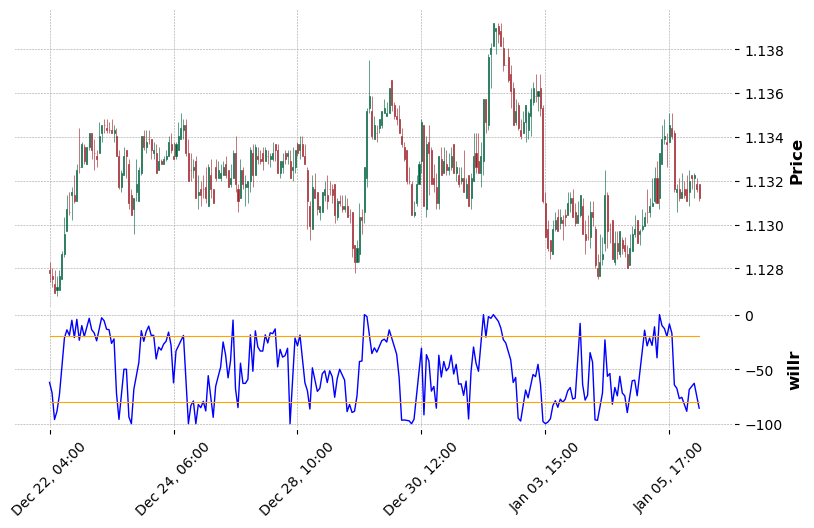

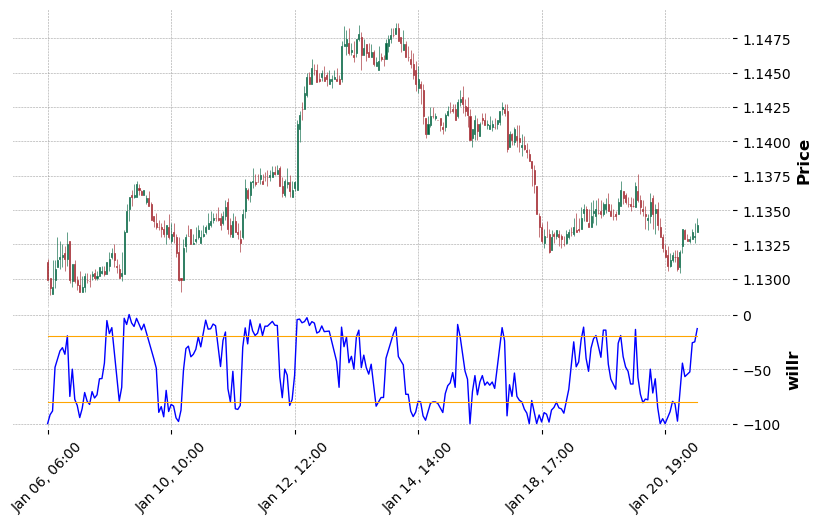

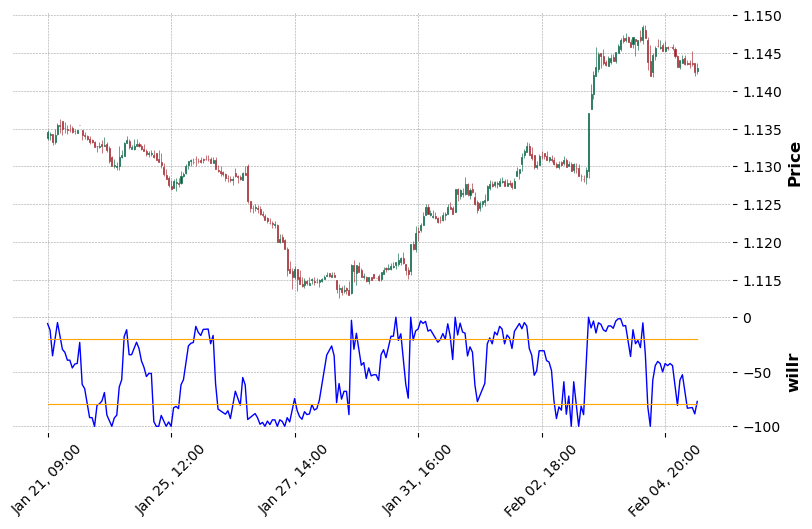

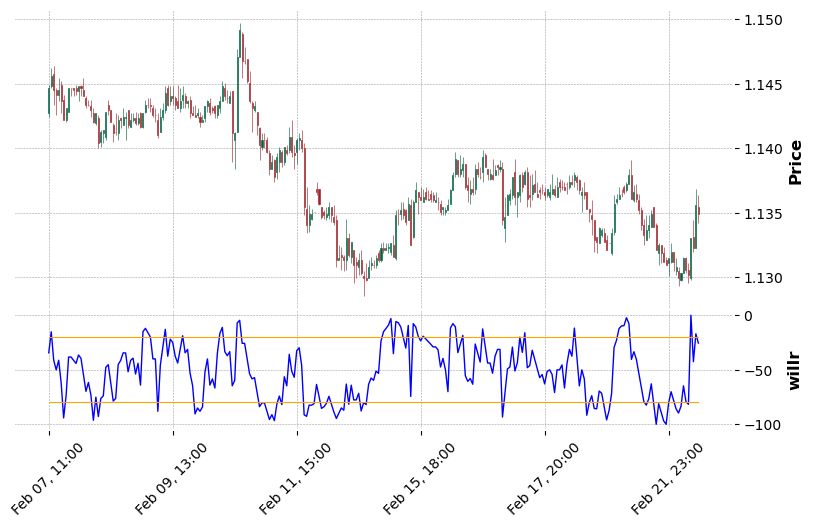

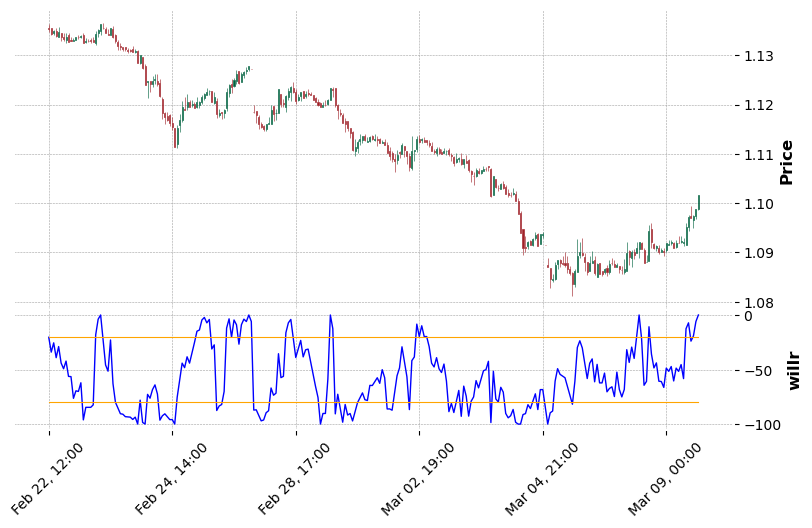

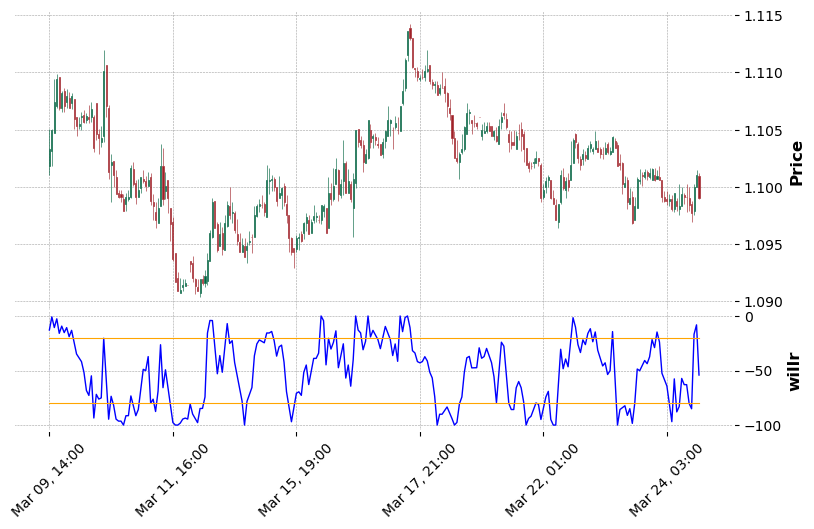

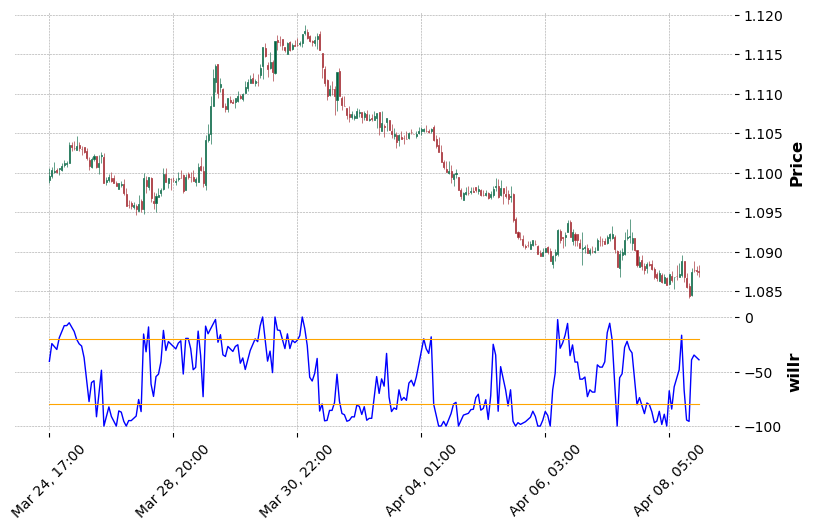

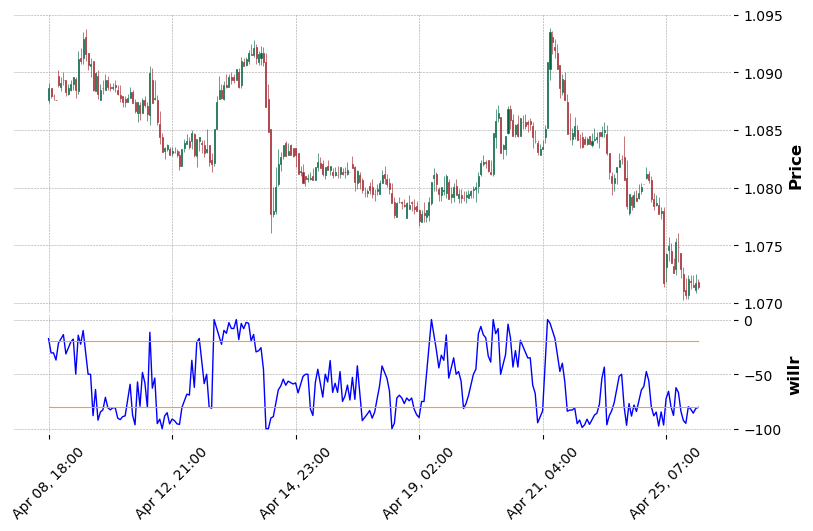

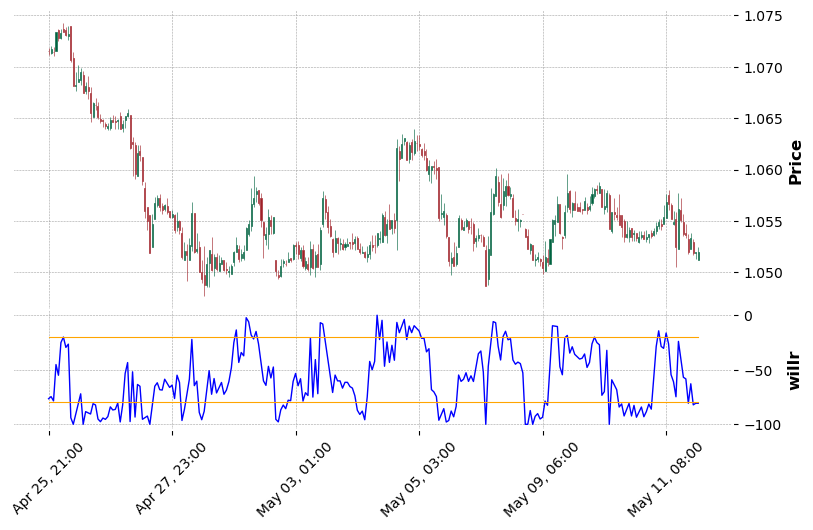

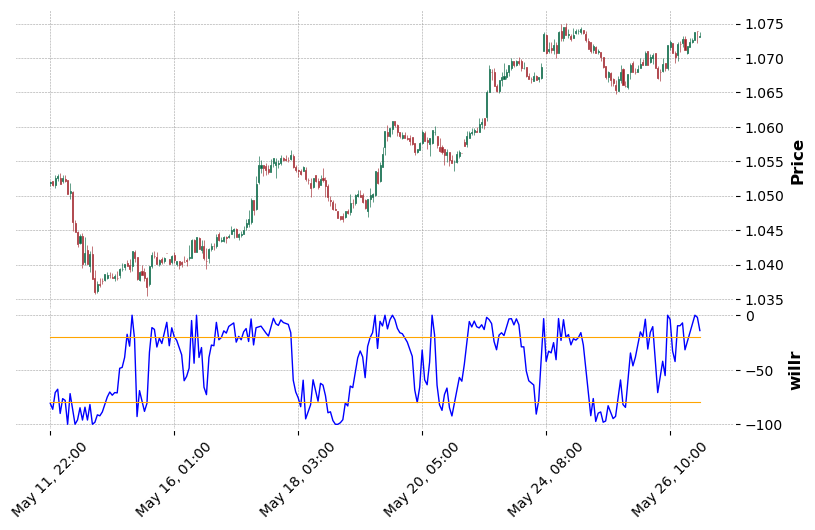

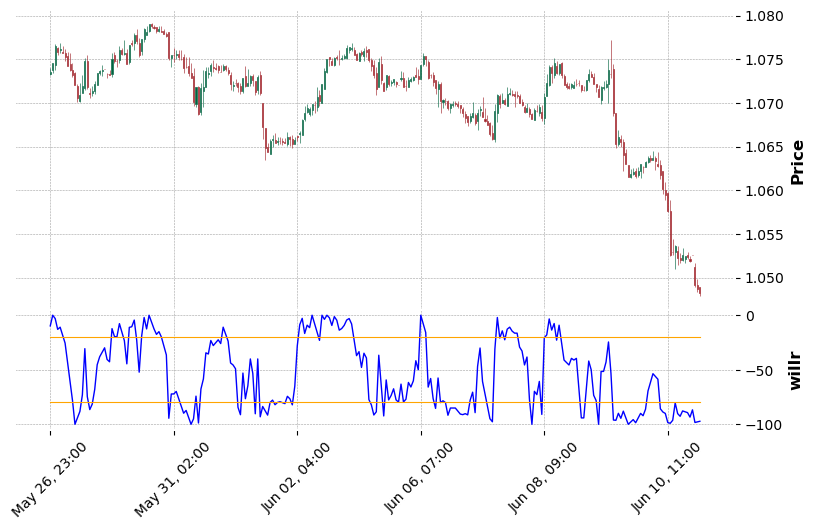

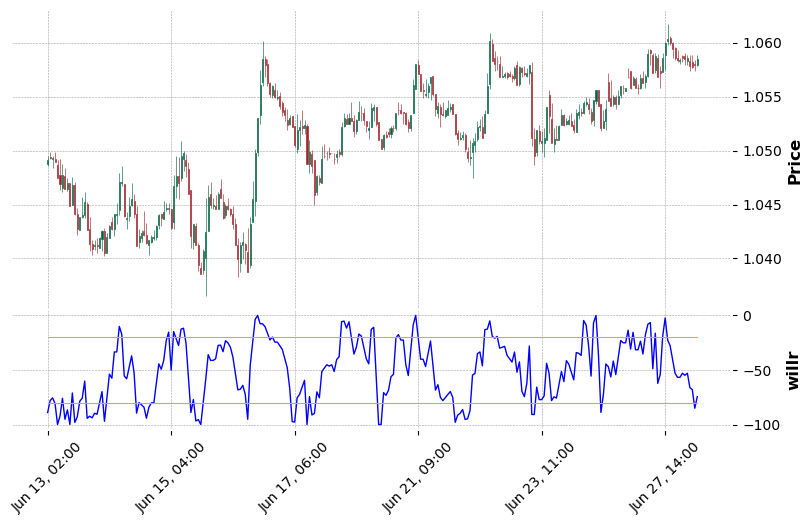

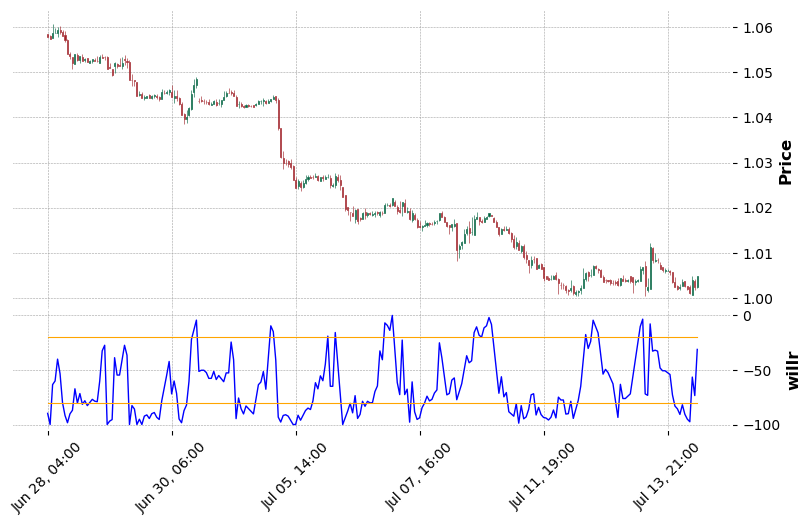

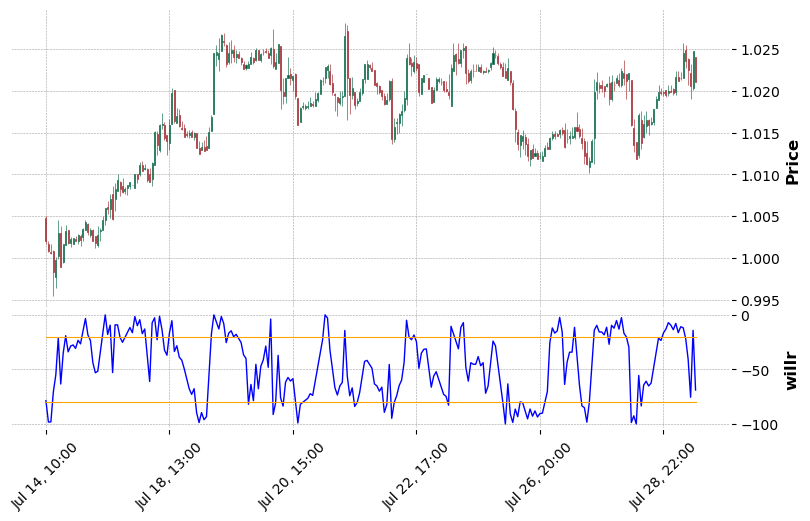

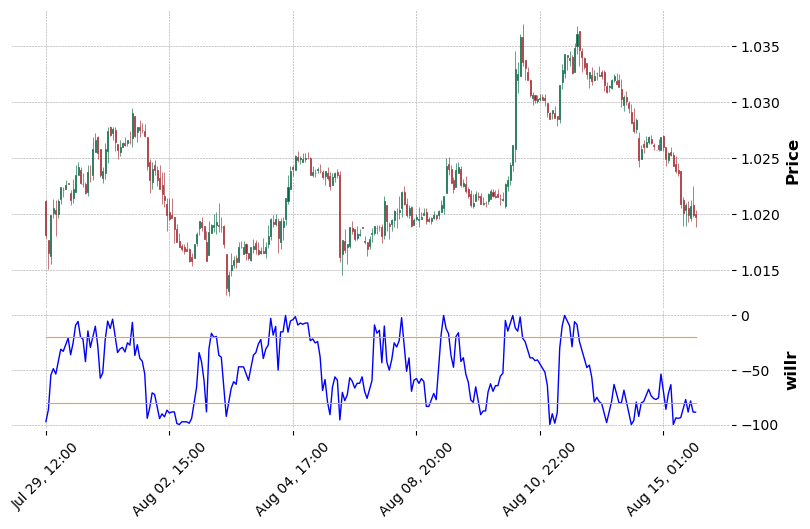

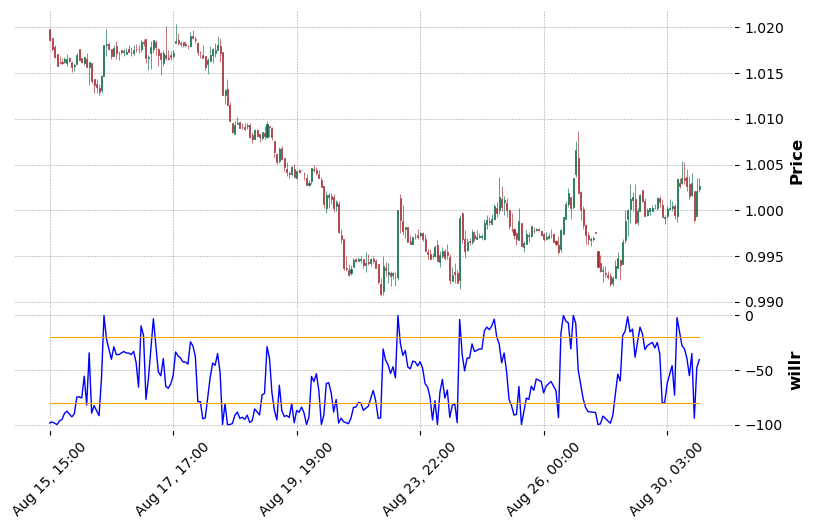

In [12]:
df_windows = np.linspace( 0, len(df), 20 )

for i in range(len(df_windows) - 1):
    start, end = int(df_windows[i]), int(df_windows[i+1])
    willr_info_plots = willr_plot(df, start, end, 14)

    mpf.plot(df.iloc[start:end], type='candle', style='charles',
         addplot=willr_info_plots,
         figsize=(10, 6))

In [11]:
def custom_willr(open, high, low, close, 
                EMA_period = 30,
                willr_length = 14) :

    vbt_ema = vbt.IndicatorFactory.from_pandas_ta('ema')
    vbt_willr = vbt.IndicatorFactory.from_pandas_ta('willr')
    ema = vbt_ema.run(close, length=EMA_period)
    willr = vbt_willr.run(close=close, low=low, high=high, length=willr_length)

    willr_df = pd.DataFrame(data=willr.willr.values, columns=['WILLR_'+str(willr_length)], index=willr.willr.index)
    ema_df = pd.DataFrame(data=ema.ema.values, columns=['EMA_'+str(EMA_period)], index=ema.ema.index)
    _df = pd.concat([willr_df, ema_df], axis=1)

    _df['prev_willr_'+str(willr_length)] = _df['WILLR_'+str(willr_length)].shift(1)
    _df['willr_'+str(willr_length)+'_crossMidup'] = (_df['prev_willr_'+str(willr_length)] < -50)&(_df['WILLR_'+str(willr_length)] >= -50)
    _df['willr_'+str(willr_length)+'_crossMiddown'] = (_df['prev_willr_'+str(willr_length)] > -50)&(_df['WILLR_'+str(willr_length)] <= -50)
    _df['willr'+str(willr_length)+'overbought'] = (_df['prev_willr_'+str(willr_length)] < -20)&(_df['WILLR_'+str(willr_length)] >= -20)
    _df['willr'+str(willr_length)+'oversold'] = (_df['prev_willr_'+str(willr_length)] > -80)&(_df['WILLR_'+str(willr_length)] <= -80)

    _df['entries'] = False
    _df['exits'] = False
    _df['short_entries'] = False
    _df['short_exits'] = False

    _df['low'] = low
    _df['high'] = high

    current_action = 'close'
    total_trade = 0
    for index, row in _df.iterrows():
        if current_action == 'close':
            if (row['willr_'+str(willr_length)+'_crossMidup'] == True) and (row['low'] > row['EMA_'+str(EMA_period)]):
                _df.at[index, 'entries'] = True
                current_action = 'long'
                total_trade = total_trade + 1
                
            elif (row['willr_'+str(willr_length)+'_crossMiddown'] == True) and (row['high'] < row['EMA_'+str(EMA_period)]):
                _df.at[index, 'short_entries'] = True
                current_action = 'short'
                total_trade = total_trade + 1
            
        elif current_action == 'long':
            # if (row['WILLR_'+str(willr_length)] < 50): # or (row['low'] < row['EMA_'+str(EMA_period)]):
            if row['willr'+str(willr_length)+'overbought'] == True:
                current_action = 'close'
                _df.at[index, 'exits'] = True
                    
        elif current_action == 'short':
            # if (row['WILLR_'+str(willr_length)] > 50): # or (row['high'] > row['EMA_'+str(EMA_period)]):
            if row['willr'+str(willr_length)+'oversold'] == True:
                current_action = 'close'
                _df.at[index, 'short_exits'] = True
    
    if total_trade < 30:
        df['entries'] = False
        _df['exits'] = False
        _df['short_entries'] = False
        _df['short_exits'] = False
    return _df['entries'], _df['exits'], _df['short_entries'], _df['short_exits']
    # return entries, exits

In [22]:
df_test = df.copy()
x, y, a, b = custom_willr(df_test.open, df_test.high, df_test.low, df_test.close, 61, 47)

In [23]:
port = vbt.Portfolio.from_signals(df_test['close'],
                                entries=x, 
                                exits=y,
                                short_entries=a,
                                short_exits=b,
                                fees=0.0002,
                                slippage=0.0002
                                )

In [25]:
port.plot().show()

In [24]:
port.stats()

c:\Users\A715-72G\anaconda3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

c:\Users\A715-72G\anaconda3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

c:\Users\A715-72G\anaconda3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

c:\Users\A715-72G\anaconda3\lib\site-packages\vectorbt\generic\stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                         2021-11-04 17:00:00
End                           2022-08-30 16:00:00
Period                                       5010
Start Value                                 100.0
End Value                              105.551414
Total Return [%]                         5.551414
Benchmark Return [%]                   -13.185608
Max Gross Exposure [%]                      100.0
Total Fees Paid                          1.960678
Max Drawdown [%]                         1.344377
Max Drawdown Duration                       969.0
Total Trades                                   48
Total Closed Trades                            48
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                            79.166667
Best Trade [%]                           0.534575
Worst Trade [%]                         -0.406575
Avg Winning Trade [%]                    0.182272
Avg Losing Trade [%]                    -0.151065


In [15]:
Willr_EMA = vbt.IndicatorFactory(class_name='Willr_EMA',
                                input_names=['open', 'high', 'low', 'close'],
                                param_names=['EMA_period', 'willr_length'],
                                output_names=['entries', 'exits', 'short_entries', 'short_exits'],
                               ).from_apply_func(custom_willr,
                                                 EMA_period=50,
                                                 willr_length=14)

In [16]:
df_test = df.copy()
result = Willr_EMA.run(df_test.open, df_test.high, df_test.low, df_test.close,
                 EMA_period=np.arange(20, 120),
                 willr_length=np.arange(5, 105),
                 param_product=True)

In [17]:
pf = vbt.Portfolio.from_signals(df_test['close'],
                                entries=result.entries, 
                                exits=result.exits,
                                short_entries=result.short_entries,
                                short_exits=result.short_exits,
                                fees=0.0002,
                                slippage=0.0002
                                )

In [18]:
comb_ret = pf.total_return()
pf.total_return()

willr_ema_EMA_period  willr_ema_willr_length
20                    5                        -0.132637
                      6                        -0.070761
                      7                        -0.068807
                      8                        -0.094231
                      9                        -0.093917
                                                  ...   
119                   100                      -0.009592
                      101                      -0.008429
                      102                      -0.010205
                      103                       0.006081
                      104                       0.015036
Name: total_return, Length: 10000, dtype: float64

In [19]:
pf.drawdown()

willr_ema_EMA_period         20                                          \
willr_ema_willr_length       5        6         7         8         9     
timestamp                                                                 
2021-11-04 17:00:00     0.000000  0.00000  0.000000  0.000000  0.000000   
2021-11-04 18:00:00     0.000000  0.00000  0.000000  0.000000  0.000000   
2021-11-04 19:00:00     0.000000  0.00000  0.000000  0.000000  0.000000   
2021-11-04 20:00:00     0.000000  0.00000  0.000000  0.000000  0.000000   
2021-11-04 21:00:00     0.000000  0.00000  0.000000  0.000000  0.000000   
...                          ...      ...       ...       ...       ...   
2022-08-30 12:00:00    -0.137927 -0.07299 -0.068321 -0.093758 -0.093444   
2022-08-30 13:00:00    -0.137927 -0.07299 -0.068693 -0.094120 -0.093806   
2022-08-30 14:00:00    -0.137927 -0.07299 -0.072507 -0.097830 -0.097518   
2022-08-30 15:00:00    -0.137927 -0.07299 -0.069533 -0.094937 -0.094624   
2022-08-30 16:00:00    -0.137927 -0.07299 -0.068973 -0.094393 -0.094079   

willr_ema_EMA_period                                                      ...  \
willr_ema_willr_length       10        11        12        13        14   ...   
timestamp                                                                 ...   
2021-11-04 17:00:00     0.000000  0.000000  0.000000  0.000000  0.000000  ...   
2021-11-04 18:00:00     0.000000  0.000000  0.000000  0.000000  0.000000  ...   
2021-11-04 19:00:00     0.000000  0.000000  0.000000  0.000000  0.000000  ...   
2021-11-04 20:00:00     0.000000  0.000000  0.000000  0.000000  0.000000  ...   
2021-11-04 21:00:00     0.000000  0.000000  0.000000  0.000000  0.000000  ...   
...                          ...       ...       ...       ...       ...  ...   
2022-08-30 12:00:00    -0.093590 -0.090052 -0.065125 -0.058637 -0.056774  ...   
2022-08-30 13:00:00    -0.093952 -0.091350 -0.065499 -0.059013 -0.057152  ...   
2022-08-30 14:00:00    -0.097663 -0.087928 -0.069326 -0.062867 -0.061013  ...   
2022-08-30 15:00:00    -0.094770 -0.087928 -0.066342 -0.059862 -0.058002  ...   
2022-08-30 16:00:00    -0.094225 -0.087928 -0.065780 -0.059297 -0.057435  ...   

willr_ema_EMA_period         119                                          \
willr_ema_willr_length       95        96        97        98        99    
timestamp                                                                  
2021-11-04 17:00:00     0.000000  0.000000  0.000000  0.000000  0.000000   
2021-11-04 18:00:00     0.000000  0.000000  0.000000  0.000000  0.000000   
2021-11-04 19:00:00     0.000000  0.000000  0.000000  0.000000  0.000000   
2021-11-04 20:00:00     0.000000  0.000000  0.000000  0.000000  0.000000   
2021-11-04 21:00:00     0.000000  0.000000  0.000000  0.000000  0.000000   
...                          ...       ...       ...       ...       ...   
2022-08-30 12:00:00    -0.024313 -0.016157 -0.017906 -0.046482 -0.050431   
2022-08-30 13:00:00    -0.022943 -0.014776 -0.016527 -0.045143 -0.049098   
2022-08-30 14:00:00    -0.026945 -0.018811 -0.020555 -0.049053 -0.052993   
2022-08-30 15:00:00    -0.023824 -0.015664 -0.017414 -0.046004 -0.049956   
2022-08-30 16:00:00    -0.023237 -0.015072 -0.016823 -0.045430 -0.049384   

willr_ema_EMA_period                                                      
willr_ema_willr_length       100       101       102       103       104  
timestamp                                                                 
2021-11-04 17:00:00     0.000000  0.000000  0.000000  0.000000  0.000000  
2021-11-04 18:00:00     0.000000  0.000000  0.000000  0.000000  0.000000  
2021-11-04 19:00:00     0.000000  0.000000  0.000000  0.000000  0.000000  
2021-11-04 20:00:00     0.000000  0.000000  0.000000  0.000000  0.000000  
2021-11-04 21:00:00     0.000000  0.000000  0.000000  0.000000  0.000000  
...                          ...       ...       ...       ...       ...  
2022-08-30 12:00:00    -0.020534 -0.018710 -0.020137 -0.008008 -0.001903  

In [20]:
comb_ret.loc[comb_ret.values==comb_ret.max()]

willr_ema_EMA_period  willr_ema_willr_length
61                    47                        0.055514
Name: total_return, dtype: float64

In [21]:
fig = pf.total_return().vbt.heatmap(
    x_level='willr_ema_EMA_period', y_level='willr_ema_willr_length', symmetric=False,
    trace_kwargs=dict(colorbar=dict(title='Total return', tickformat='%')))
fig.show()